In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

In [17]:
folder_path = r"C:\Users\Ibon\PycharmProjects\Microgrid\objective2_data_cleaned"

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, parse_dates=["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"])
    
    # Selecciona aleatoriamente el 5% de las filas
    sample_df = df.sample(frac=0.05, random_state=42)  # Ajusta random_state para reproducibilidad
    
    df_list.append(sample_df)

df_merged = pd.concat(df_list, ignore_index=True)
df_merged = df_merged.drop(columns='Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss')

In [18]:
# Seleccionar variables predictoras y objetivo
X = df_merged.drop(columns=['Pmp (W)'])
y = df_merged['Pmp (W)']

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [19]:
# Modelo de Regresión Lineal con Ridge
ridge = Ridge()

In [20]:
# Definir hiperparámetros a probar
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}  # Regularización

In [21]:
# Hiperparameter Tuning con GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo encontrado
best_ridge = grid_search.best_estimator_

In [22]:
# Evaluación del modelo
y_pred = best_ridge.predict(X_test_scaled)

print(f"Mejor alpha: {grid_search.best_params_['alpha']}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

Mejor alpha: 1
MAE: 14.2514
RMSE: 25.0607
R² Score: 0.5644


C:\Users\Ibon\AppData\Local\Temp\ipykernel_19404\2787631799.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


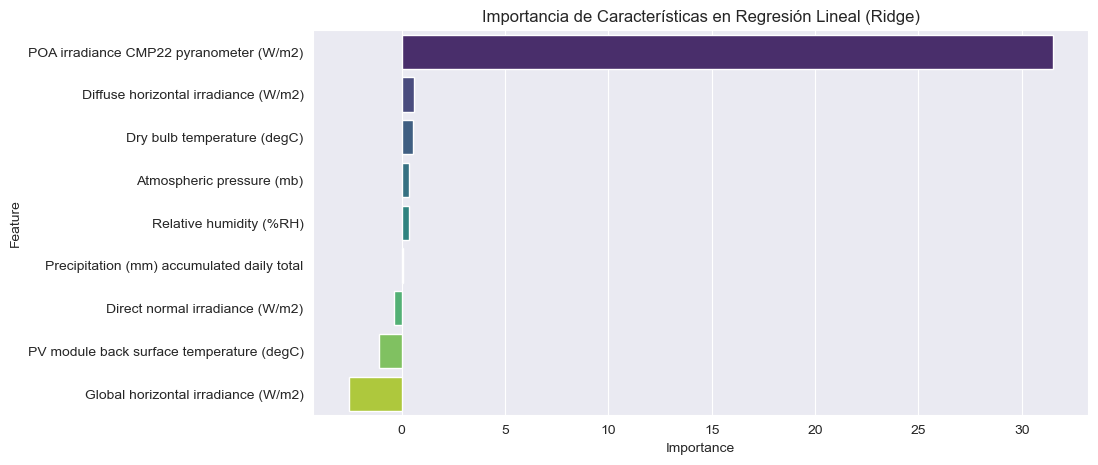

In [23]:
# Importancia de características (coeficientes del modelo)
feature_importance = pd.DataFrame(
    {"Feature": X.columns, "Importance": best_ridge.coef_}
).sort_values(by="Importance", ascending=False)

# Visualización de importancia de características
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Importancia de Características en Regresión Lineal (Ridge)")
plt.show()


Test Set Evaluation:

Test Set:
Mean Squared Error: 628.0382
Root Mean Squared Error: 25.0607
R² Score: 0.5644


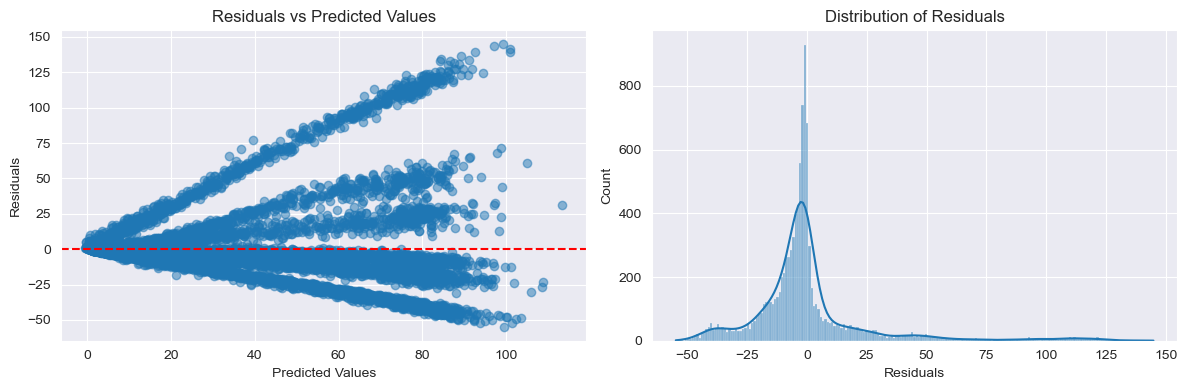

In [24]:
# Model evaluation
def evaluate_regression(y_true, y_pred, title="Model Evaluation"):
    """
    Evaluate regression model performance
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{title}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Residual plot
    residuals = y_true - y_pred
    plt.figure(figsize=(12, 4))
    
    # Residuals vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    
    # Residual distribution
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Count')
    plt.title('Distribution of Residuals')
    
    plt.tight_layout()
    plt.show()

print("\nTest Set Evaluation:")
evaluate_regression(y_test, y_pred, "Test Set")